# DS-SF-30 | Codealong 09: Linear Regression, Part 3

In [19]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from scipy.optimize import curve_fit

import seaborn as sns

## Part A - Model Fit and Customer Retention

In [49]:
# TODO

df = pd.read_csv(os.path.join('..', 'datasets', 'retention.csv'))

df

,Year,Retention_Rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


In [52]:
#df[ ['Retention_RateMod', 'YearMod'] ] = df[ ['Retention_Rate', 'Year'] ].apply(np.log10)
df[ ['Retention_RateMod'] ] = df[ ['Retention_Rate'] ].apply(np.log10)

df

,Year,Retention_Rate,Retention_RateMod,YearMod
0,0,1.000,0.000000,-inf
1,1,0.869,-0.060980,0.000000
2,2,0.743,-0.129011,0.301030
3,3,0.653,-0.185087,0.477121
4,4,0.593,-0.226945,0.602060
5,5,0.551,-0.258848,0.698970
6,6,0.517,-0.286509,0.778151
7,7,0.491,-0.308919,0.845098


In [53]:
model = smf.ols(formula = 'Retention_RateMod ~ Year', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Retention_RateMod   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     159.1
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.52e-05
Time:                        19:53:00   Log-Likelihood:                 20.061
No. Observations:                   8   AIC:                            -36.12
Df Residuals:                       6   BIC:                            -35.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0270      0.015     -1.836      0.116        -0.063     0.009
Year          -0.0443      0.004    -12.615      0.000        -0.053    -0.036
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                0.739
Skew:                           0.196   Prob(JB):                        0.691
Kurtosis:                       1.564   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

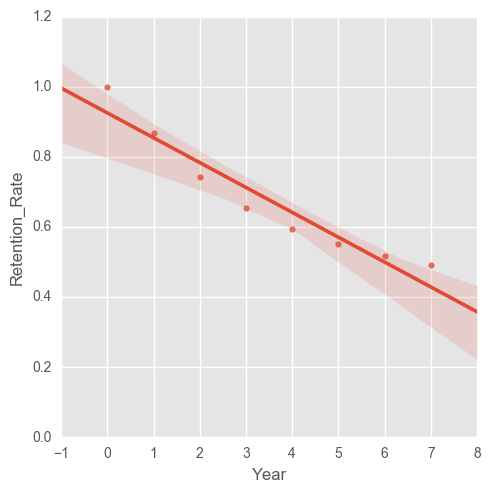

In [36]:
sns.lmplot(x = 'Year', y = 'Retention_Rate', data = df)

## Part B - One-Hot Encoding for Categorical Variables and SF Housing

In [54]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [55]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [56]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.94e-31
Time:                        20:37:55   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

df.drop(df[df.IsAStudio == 1].index, inplace = True)

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [58]:
# TODO

df = df[df.Baths.isin([1, 2, 3, 4])]

df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.1500,0.0,NaN,2.0,1.430,2.435,1948.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.5000,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.9700,0.0,2.0,2.0,1.299,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.9400,0.0,2.0,2.0,1.033,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.8350,0.0,1.0,1.0,1.048,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2.8300,0.0,3.0,2.0,2.115,1.271,1913.0
15064669,"1055 Lombard St # C, San Francisco, CA",12/31/15,2.1900,0.0,2.0,3.0,1.182,NaN,1986.0
15065032,"101 Lombard St APT 116E, San Francisco, CA",12/7/15,0.8000,0.0,1.0,1.0,1.000,NaN,1983.0
15065140,"1407 Montgomery St APT 2, San Francisco, CA",1/28/16,0.9760,0.0,1.0,1.0,1.000,NaN,1870.0


> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [59]:
# TODO
baths_df = pd.get_dummies(df.Baths, prefix = 'Bath')

In [60]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [61]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [62]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [63]:
df = df.join([baths_df])

In [64]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'Beds',
       u'Baths', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

In [65]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,...,BuiltInYear,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.1500,0.0,NaN,...,1948.0,0.0,1.0,0.0,0.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.5000,0.0,1.0,...,1930.0,1.0,0.0,0.0,0.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.9700,0.0,2.0,...,1993.0,0.0,1.0,0.0,0.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.9400,0.0,2.0,...,1993.0,0.0,1.0,0.0,0.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.8350,0.0,1.0,...,1975.0,1.0,0.0,0.0,0.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2.8300,0.0,3.0,...,1913.0,0.0,1.0,0.0,0.0
15064669,"1055 Lombard St # C, San Francisco, CA",12/31/15,2.1900,0.0,2.0,...,1986.0,0.0,0.0,1.0,0.0
15065032,"101 Lombard St APT 116E, San Francisco, CA",12/7/15,0.8000,0.0,1.0,...,1983.0,1.0,0.0,0.0,0.0
15065140,"1407 Montgomery St APT 2, San Francisco, CA",1/28/16,0.9760,0.0,1.0,...,1870.0,1.0,0.0,0.0,0.0


### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [66]:
# TODO

model = smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:47:12   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [67]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:47:58   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath_1        -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath_3         0.1977      0.143      1.386      0.166        -0.082     0.478
Bath_4         0.9290      0.232      4.003      0.000         0.473     1.384
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [68]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_4', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:48:17   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.124     11.881      0.000         1.229     1.715
Bath_1        -0.4808      0.142     -3.383      0.001        -0.760    -0.202
Bath_2        -0.1977      0.143     -1.386      0.166        -0.478     0.082
Bath_4         0.7313      0.253      2.886      0.004         0.234     1.229
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [69]:
# TODO
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_3', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:48:34   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part C - The Adverstising Dataset

In [71]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [72]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Plots

> ### Sales ~ TV

In [ ]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

### Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

model.summary()

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D - Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [73]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 12 Jan 2017   Prob (F-statistic):          3.19e-144
Time:                        21:25:39   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

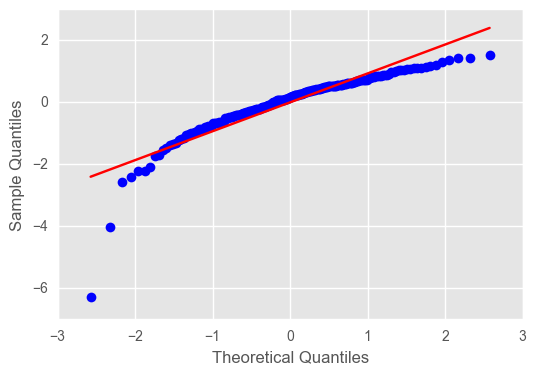

In [74]:
sm.qqplot(model.resid, line = 's')

pass

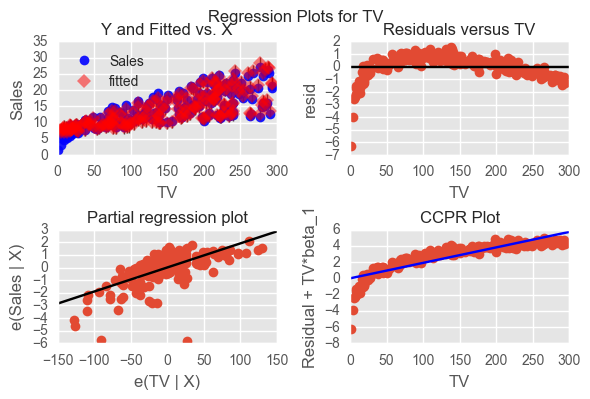

In [75]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

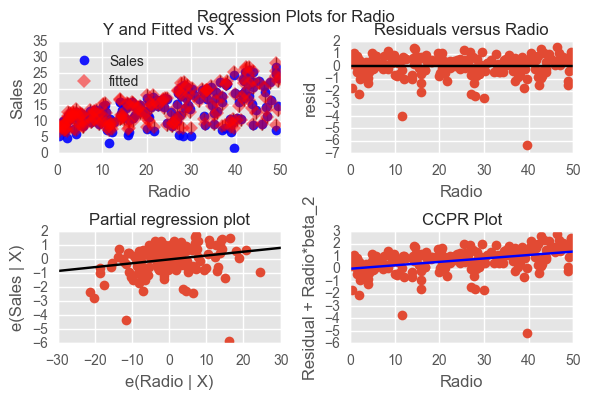

In [76]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

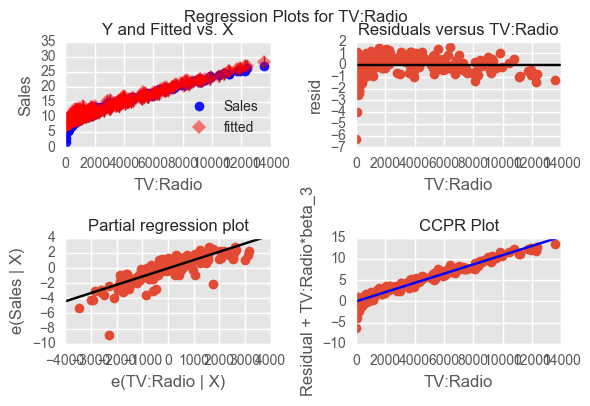

In [77]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass